In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
df.describe(include='object')

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


The TotalCharges column, seems to be float type but, info shows it as object, also the describe shows that the top value is empty string (11 times), this empty string might here be used as the null value, and because of it info count it as the object type.

In [8]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [9]:
df['TotalCharges'].isnull().sum()

np.int64(11)

Those 11 empty string, here now are the null values, but new coustomer can have the 0 charges (logically) therefore we will replace it with 0 value.

In [10]:
df['TotalCharges'].fillna(0, inplace=True)

/tmp/ipykernel_36685/171940771.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(0, inplace=True)


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Now the TotalCharges shows the float type

Text(0, 0.5, 'count')

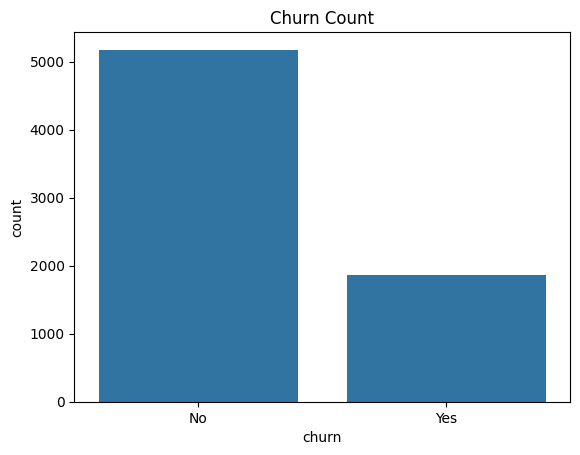

In [12]:
sns.countplot(x='Churn', data=df)
plt.title('Churn Count')
plt.xlabel('churn')
plt.ylabel('count')

In [13]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [14]:
categorical_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

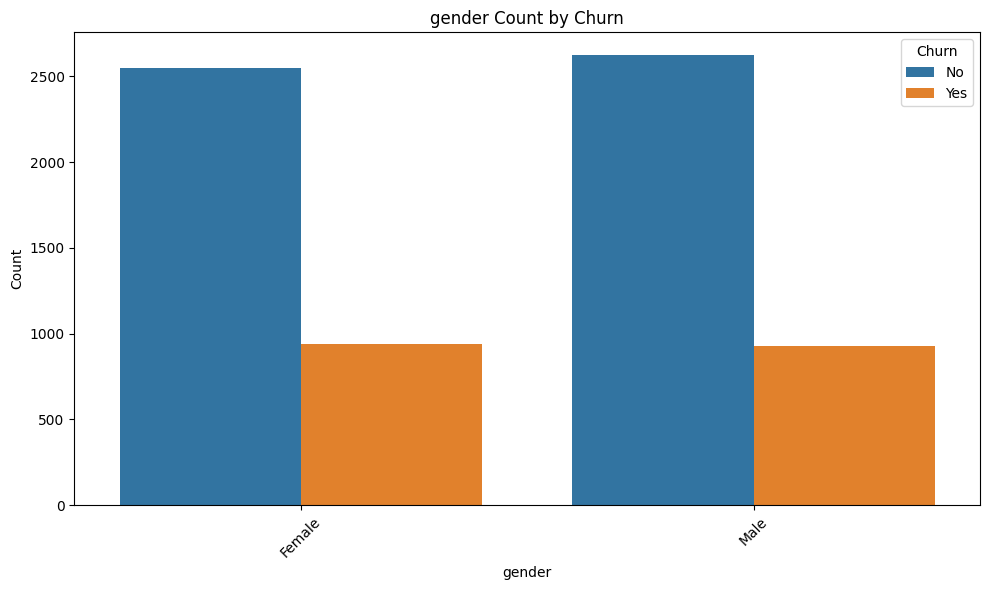

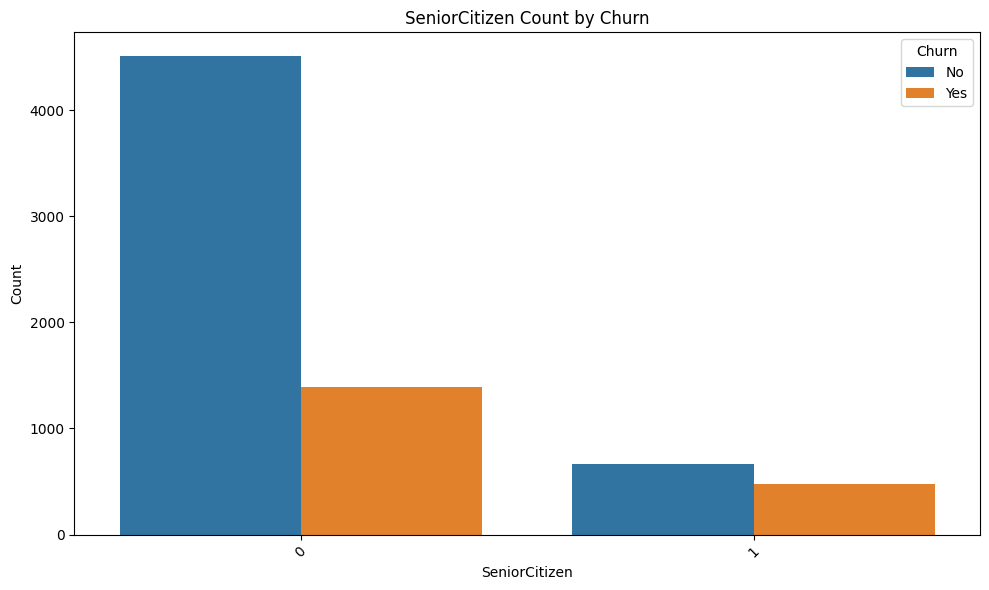

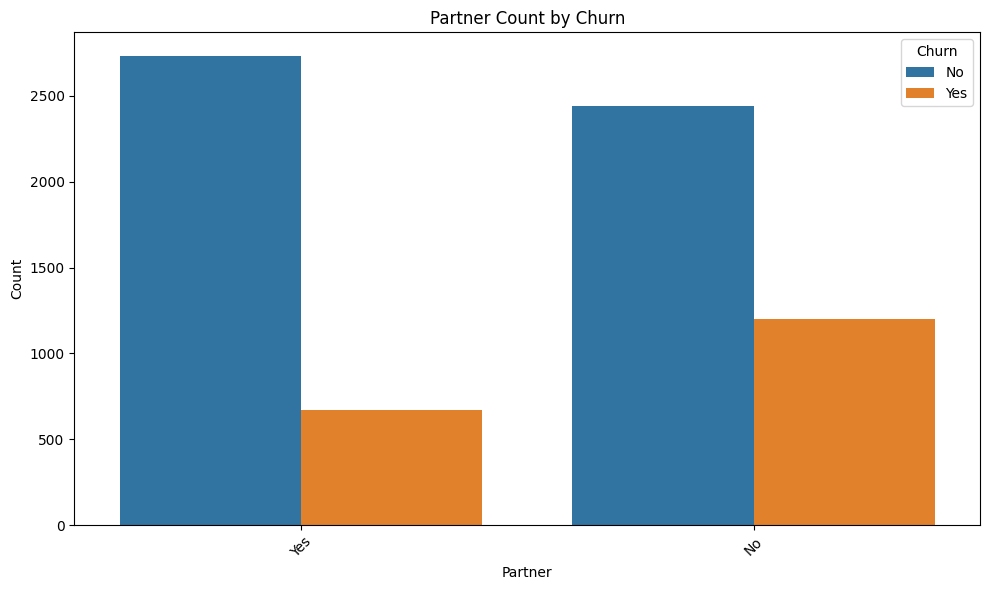

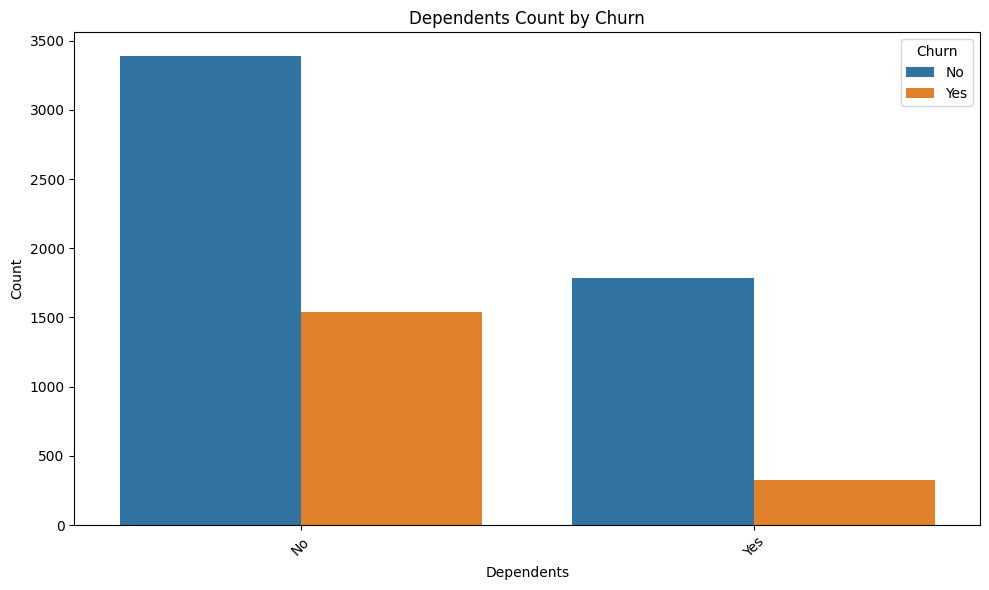

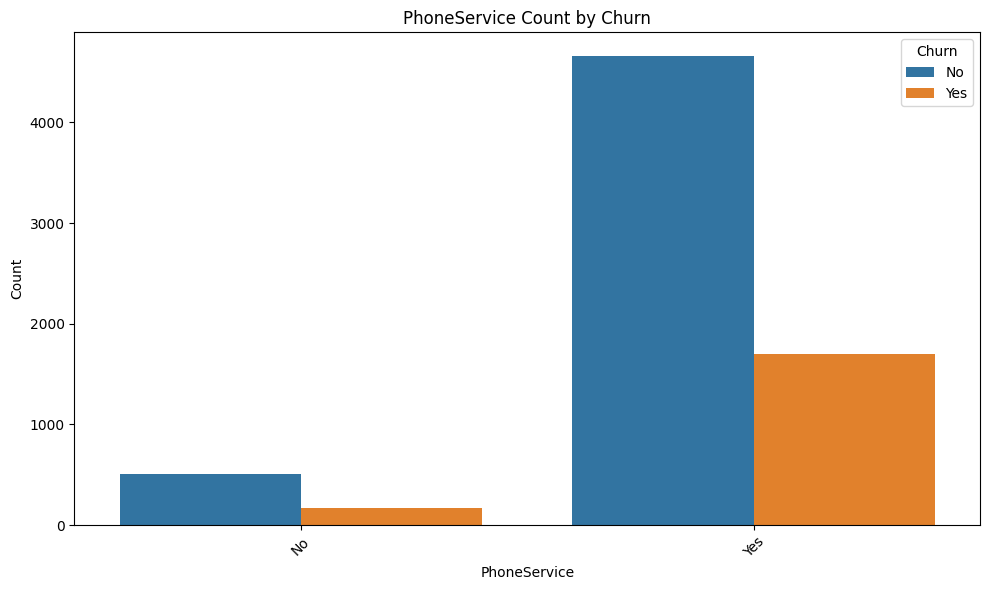

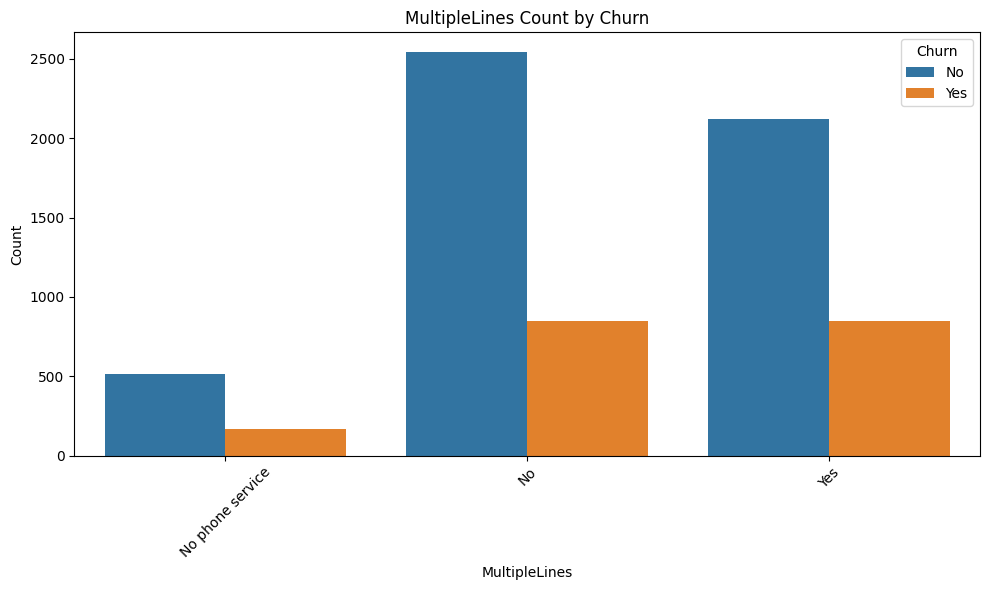

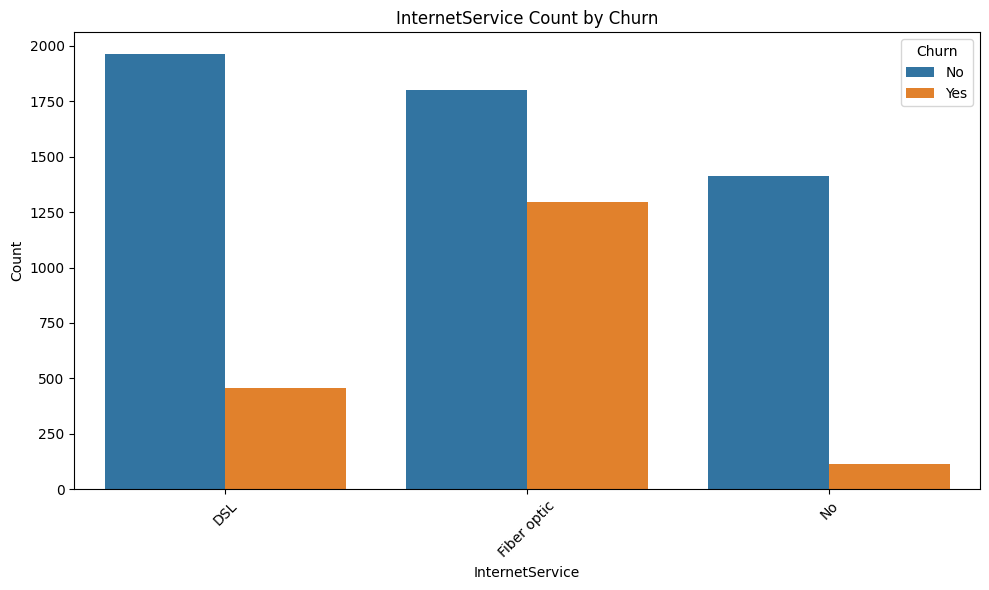

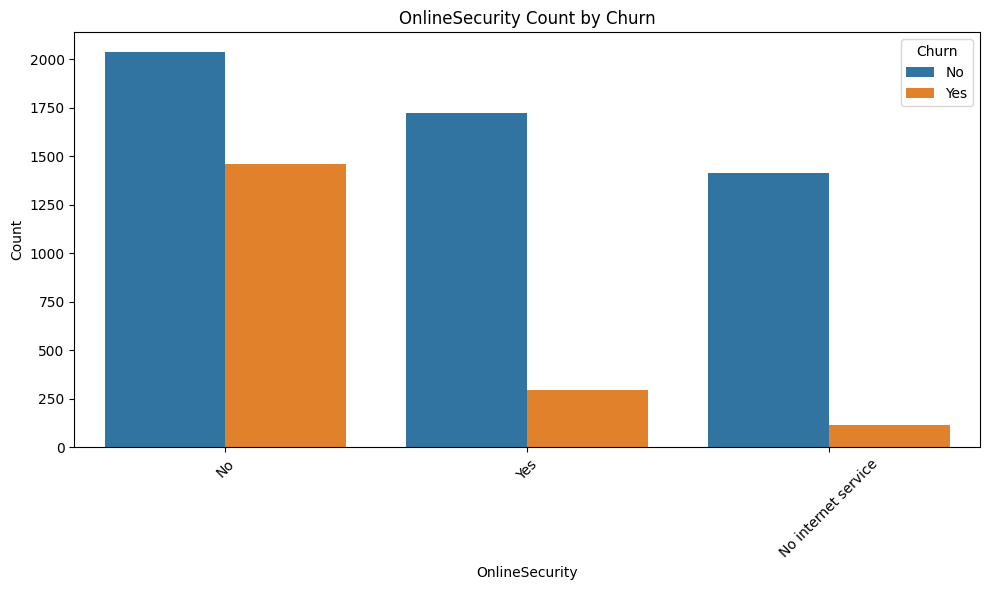

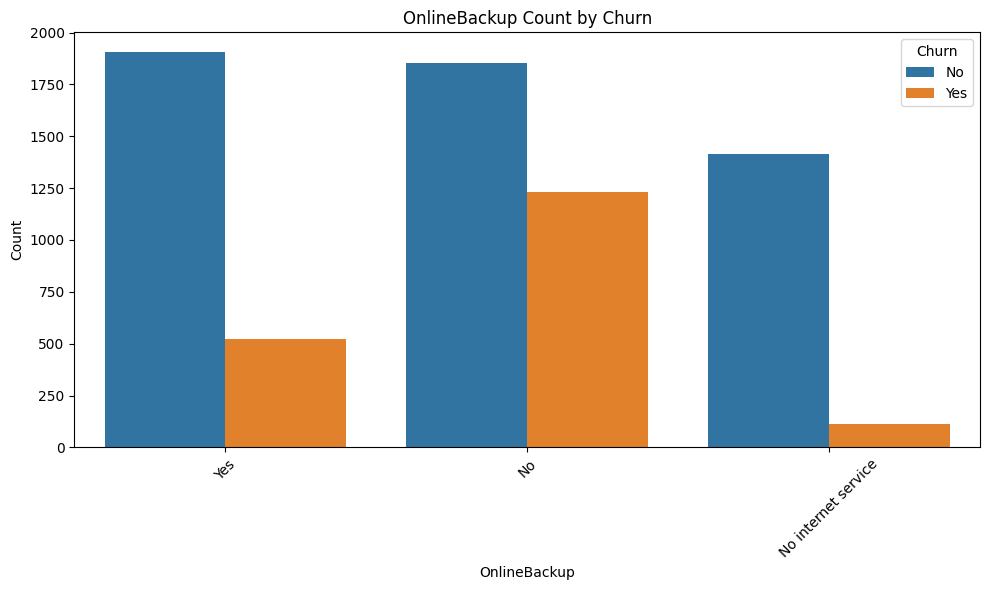

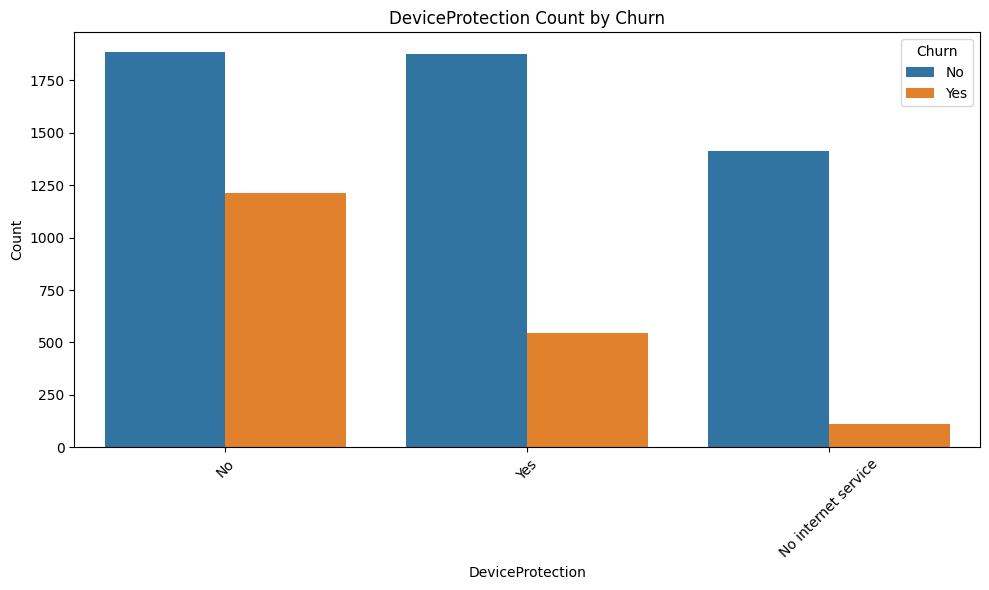

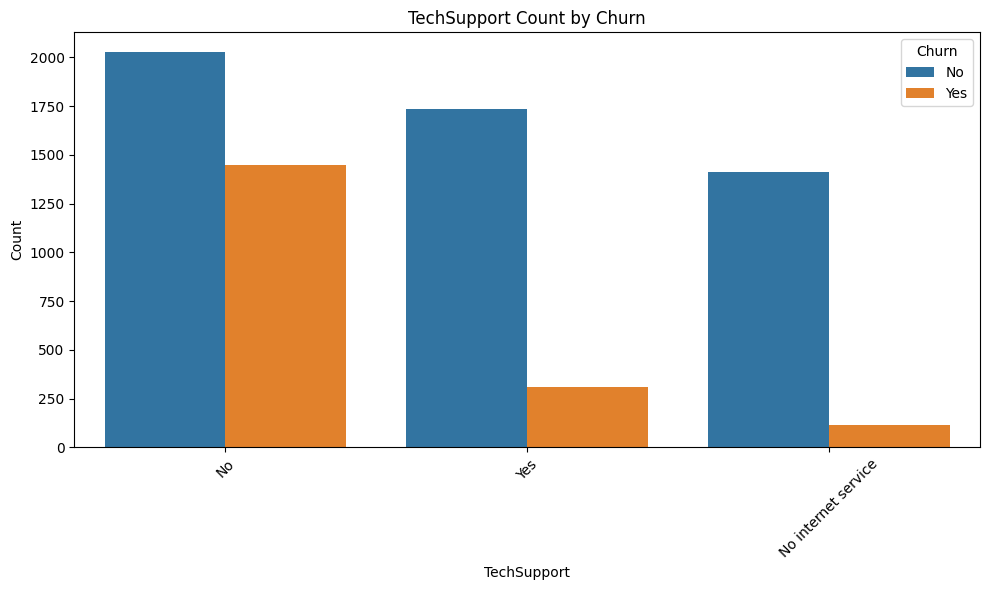

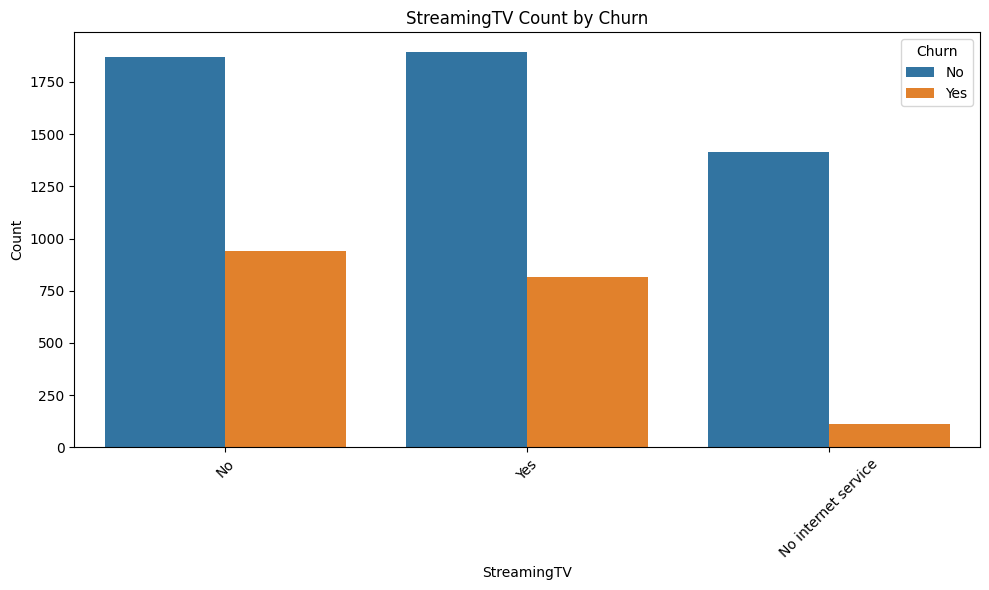

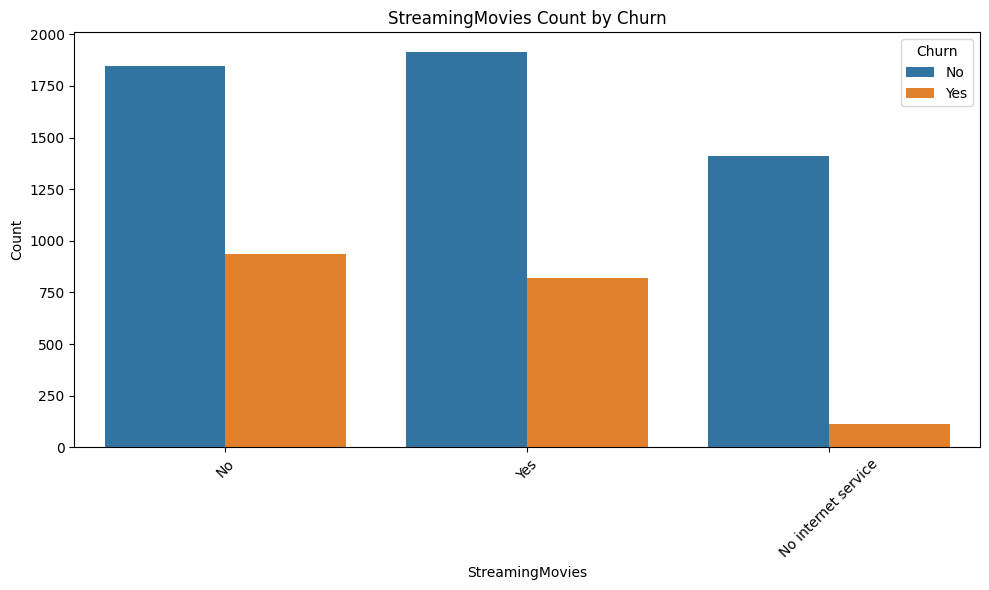

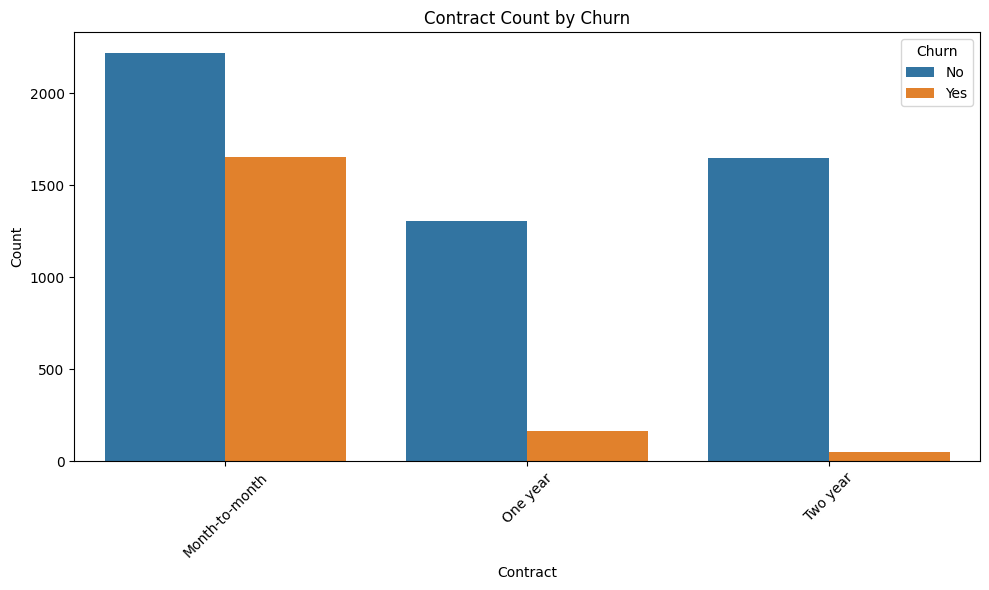

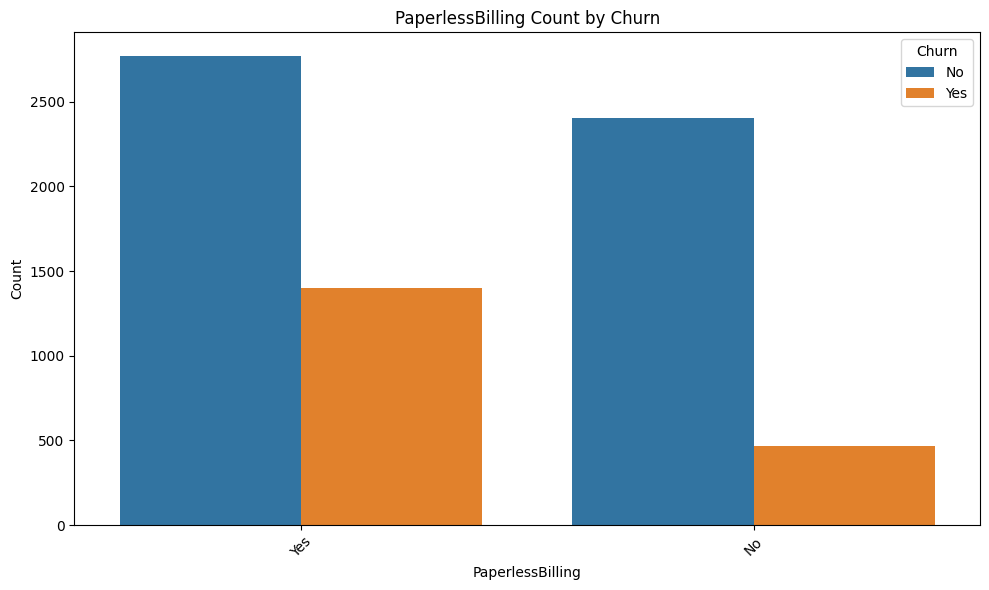

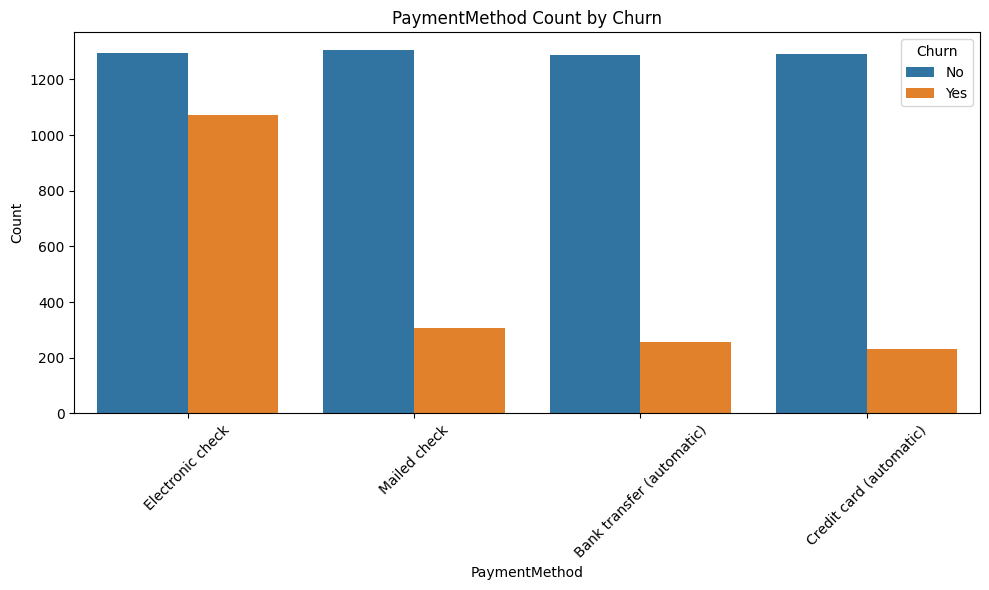

In [15]:
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=feature, hue='Churn', data=df)
    plt.title(f'{feature} Count by Churn')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

The Contact, InternetService, and PaymentMethod features seems to be strong indicators, while the Gender and PhoneService are weak ones, other being moderate. 
The lower contact coustomer, fiber optics services and electronic check payment are the onces haveing higher churn rate.

Text(0, 0.5, 'Number of Customers')

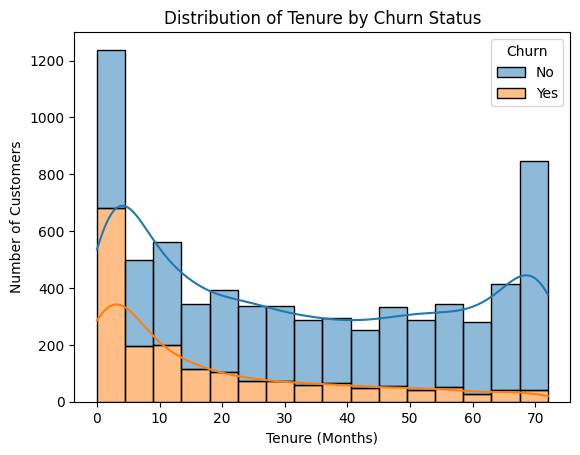

In [16]:
sns.histplot(data=df, x='tenure', hue='Churn', multiple='stack', kde=True)

plt.title('Distribution of Tenure by Churn Status')
plt.xlabel('Tenure (Months)')
plt.ylabel('Number of Customers')

Tenure is strong predictor, churn = yes is heacvilly skewed to the left

Text(0, 0.5, 'Monthly Charges')

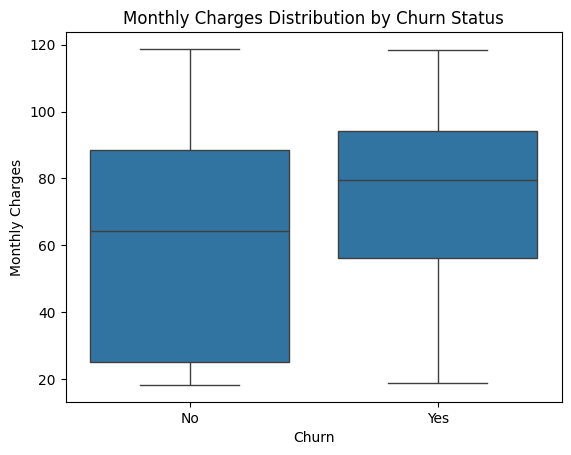

In [17]:
sns.boxplot(data=df, x='Churn', y='MonthlyCharges')

plt.title('Monthly Charges Distribution by Churn Status')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')

The higher monthly charges shows higher churn rate.

Text(0, 0.5, 'Total Charges')

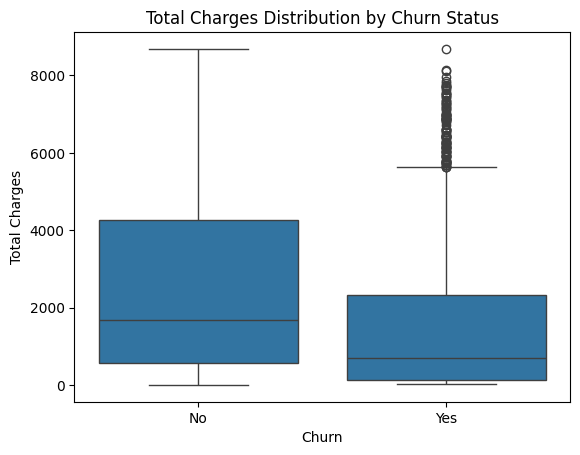

In [18]:
sns.boxplot(data=df, x='Churn', y='TotalCharges')

plt.title('Total Charges Distribution by Churn Status')
plt.xlabel('Churn')
plt.ylabel('Total Charges')

lower charges have the higher rate, maybe lower tenure people who leave does not total higher charges, they leave too early.

In [19]:
df = df.drop('customerID', axis=1)

In [20]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

In [21]:
df_encoded = pd.get_dummies(df, drop_first=True)

df_encoded.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,False,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
1,0,34,56.95,1889.50,0,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,True,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
3,0,45,42.30,1840.75,0,True,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
4,0,2,70.70,151.65,1,False,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False


In [22]:
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

In [23]:
from sklearn.preprocessing import StandardScaler

st = StandardScaler()

numeric_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
X[numeric_features] = st.fit_transform(X[numeric_features])

X.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,-1.277445,-1.160323,-0.992611,False,True,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False
1,0,0.066327,-0.259629,-0.172165,True,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,True
2,0,-1.236724,-0.362660,-0.958066,True,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,True
3,0,0.514251,-0.746535,-0.193672,True,False,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
4,0,-1.236724,0.197365,-0.938874,False,False,False,True,False,False,...,False,False,False,False,False,False,True,False,True,False


In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from xgboost import XGBClassifier


base_models = [
    ('lr', LogisticRegression(max_iter=1000, class_weight='balanced')),
    ('svm', SVC(probability=True, class_weight='balanced')),
    ('knn', KNeighborsClassifier(n_neighbors=5)),
    ('rf', RandomForestClassifier(class_weight='balanced'))   
]

meta_model = XGBClassifier()

In [26]:
stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)

stacking_model.fit(X_train, y_train)

,estimators,"[('lr', ...), ('svm', ...), ...]"
,final_estimator,"XGBClassifier...ree=None, ...)"
,cv,5
,stack_method,'auto'
,n_jobs,None
,passthrough,False
,verbose,0
,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0


In [27]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = stacking_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.89      0.86      1035
           1       0.61      0.48      0.54       374

    accuracy                           0.78      1409
   macro avg       0.72      0.68      0.70      1409
weighted avg       0.77      0.78      0.77      1409



Text(50.722222222222214, 0.5, 'Actual')

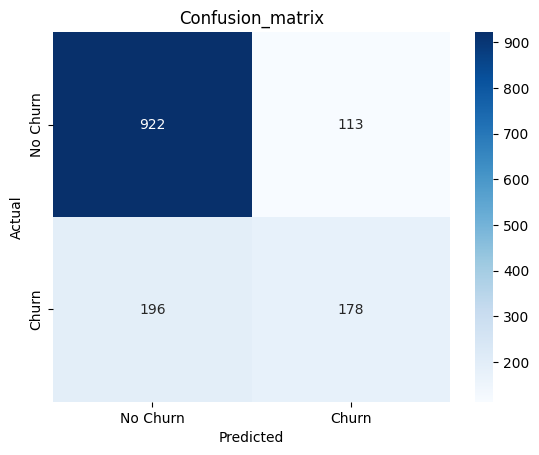

In [28]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title('Confusion_matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

/home/prashikbhimte/projects/ML-Projects/3TelcoCustomerChurnPrediction/venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


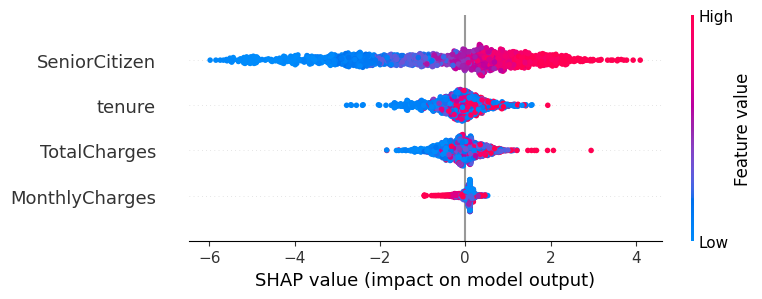

In [29]:
import shap 

explainer = shap.TreeExplainer(stacking_model.final_estimator_)

X_test_transformed = stacking_model.transform(X_test)
shap_values = explainer.shap_values(X_test_transformed)

shap.summary_plot(shap_values, X_test_transformed, feature_names=X.columns)

The SeniorCitizen is strong predictor of churn, the most senior citizen seems to leave. Low tenure customer are with high churn. More monthly charges and low total charges are one who leaving.

In [30]:
from imblearn.over_sampling import SMOTE

somte = SMOTE(random_state=42)

X_train_somte, y_train_somte = somte.fit_resample(X_train, y_train)

In [31]:
stacking_model.fit(X_train_somte, y_train_somte)

,estimators,"[('lr', ...), ('svm', ...), ...]"
,final_estimator,"XGBClassifier...ree=None, ...)"
,cv,5
,stack_method,'auto'
,n_jobs,None
,passthrough,False
,verbose,0
,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0


In [32]:
y_pred = stacking_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.83      0.83      1035
           1       0.54      0.55      0.54       374

    accuracy                           0.76      1409
   macro avg       0.69      0.69      0.69      1409
weighted avg       0.76      0.76      0.76      1409



the overall accuracy decrease but the recall for 1 singinificantlly increased

In [33]:
service_columns = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 
                   'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

In [34]:
df['ServicesUsed'] = df[service_columns].apply(lambda row: sum(1 for val in row if val == 'Yes'), axis=1)

df['TenureInYears'] = df['tenure'] // 12

df['MonthToTotalRatio'] = df['MonthlyCharges'] / (df['TotalCharges'] + 1e-6)

In [35]:
df_encoded = pd.get_dummies(df, drop_first=True)

df_encoded.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,ServicesUsed,TenureInYears,MonthToTotalRatio,gender_Male,Partner_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,1.000000,False,True,...,False,False,False,False,False,False,True,False,True,False
1,0,34,56.95,1889.50,0,3,2,0.030140,True,False,...,False,False,False,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,3,0,0.497920,True,False,...,False,False,False,False,False,False,True,False,False,True
3,0,45,42.30,1840.75,0,3,3,0.022980,True,False,...,False,False,False,False,True,False,False,False,False,False
4,0,2,70.70,151.65,1,1,0,0.466205,False,False,...,False,False,False,False,False,False,True,False,True,False


In [36]:
X = df_encoded.drop(['Churn', 'tenure', 'TotalCharges', 'MonthlyCharges'], axis=1)
y = df_encoded['Churn']

In [37]:
X.head()

,SeniorCitizen,ServicesUsed,TenureInYears,MonthToTotalRatio,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1.000000,False,True,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False
1,0,3,2,0.030140,True,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,True
2,0,3,0,0.497920,True,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,True
3,0,3,3,0.022980,True,False,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
4,0,1,0,0.466205,False,False,False,True,False,False,...,False,False,False,False,False,False,True,False,True,False


In [38]:
st2 = StandardScaler()
numeric_features = ['TenureInYears', 'MonthToTotalRatio']

X[numeric_features] = st2.fit_transform(X[numeric_features])

In [39]:
import joblib

joblib.dump(st2, 'scaler.pkl')
joblib.dump(X.columns, 'training_columns.pkl')

['training_columns.pkl']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [41]:
smote2 = SMOTE(random_state=42)
X_train_somte, y_train_somte = smote2.fit_resample(X_train, y_train)

In [42]:
stacking_model.fit(X_train_somte, y_train_somte)

,estimators,"[('lr', ...), ('svm', ...), ...]"
,final_estimator,"XGBClassifier...ree=None, ...)"
,cv,5
,stack_method,'auto'
,n_jobs,None
,passthrough,False
,verbose,0
,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0


In [43]:
y_pred = stacking_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.85      0.84      1035
           1       0.56      0.55      0.56       374

    accuracy                           0.77      1409
   macro avg       0.70      0.70      0.70      1409
weighted avg       0.77      0.77      0.77      1409



Overall accuracy and preicison has slightly increased and recall has derceased little.

In [44]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'final_estimator__n_estimators': [100, 200],
    'final_estimator__max_depth': [3, 5, 7],
    'final_estimator__learning_rate': [0.05, 0.1],
    'final_estimator__subsample': [0.7, 1.0]
}

stacking_model_for_grid = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)

grid_search = GridSearchCV(estimator=stacking_model_for_grid, param_grid=param_grid, cv=3, n_jobs=-1, scoring='recall', verbose=2)

grid_search.fit(X_train_somte, y_train_somte)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


[CV] END final_estimator__learning_rate=0.05, final_estimator__max_depth=3, final_estimator__n_estimators=100, final_estimator__subsample=0.7; total time=  58.4s
[CV] END final_estimator__learning_rate=0.05, final_estimator__max_depth=3, final_estimator__n_estimators=100, final_estimator__subsample=1.0; total time= 1.0min
[CV] END final_estimator__learning_rate=0.05, final_estimator__max_depth=3, final_estimator__n_estimators=100, final_estimator__subsample=0.7; total time= 1.2min
[CV] END final_estimator__learning_rate=0.05, final_estimator__max_depth=3, final_estimator__n_estimators=100, final_estimator__subsample=0.7; total time= 1.2min
[CV] END final_estimator__learning_rate=0.05, final_estimator__max_depth=3, final_estimator__n_estimators=100, final_estimator__subsample=1.0; total time= 1.3min
[CV] END final_estimator__learning_rate=0.05, final_estimator__max_depth=3, final_estimator__n_estimators=100, final_estimator__subsample=1.0; total time= 1.3min
[CV] END final_estimator__le

,estimator,"StackingClass...ee=None, ...))"
,param_grid,"{'final_estimator__learning_rate': [0.05, 0.1], 'final_estimator__max_depth': [3, 5, ...], 'final_estimator__n_estimators': [100, 200], 'final_estimator__subsample': [0.7, 1.0]}"
,scoring,'recall'
,n_jobs,-1
,refit,True
,cv,3
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l2'


In [45]:
grid_search.best_params_

{'final_estimator__learning_rate': 0.05,
 'final_estimator__max_depth': 3,
 'final_estimator__n_estimators': 200,
 'final_estimator__subsample': 0.7}

In [46]:
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.83      0.84      1035
           1       0.55      0.57      0.56       374

    accuracy                           0.76      1409
   macro avg       0.70      0.70      0.70      1409
weighted avg       0.77      0.76      0.77      1409



Overall accuracy reach to 77% and we got some best recall and precision

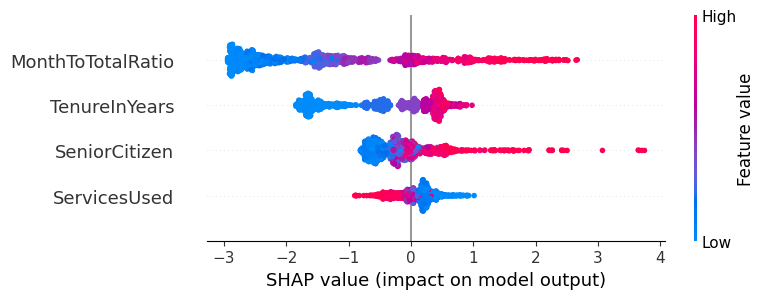

In [47]:
explainer = shap.TreeExplainer(best_model.final_estimator_)

X_test_transformed = best_model.transform(X_test)
shap_values = explainer.shap_values(X_test_transformed)

shap.summary_plot(shap_values, X_test_transformed, feature_names=X.columns)

THe MonthToTotalRatio is stongest one to predict the churn, when the monthly charges became the large part of the total charge, customer is likelly to leave. TenureInYears shows the customer loyalty increase with time. The customers who are into many service seems less likely to leave. 

In [48]:
joblib.dump(best_model, 'stacked_churn_model.pkl')

['stacked_churn_model.pkl']

In [49]:
import mlflow

with mlflow.start_run(run_name="Final Stacked Model"):
    best_params = grid_search.best_params_
    mlflow.log_params(best_params)

    y_pred_final = best_model.predict(X_test)
    report = classification_report(y_test, y_pred_final, output_dict=True)

    mlflow.log_metric("accuracy", report['accuracy'])
    mlflow.log_metric("churn_precision", report['1']['precision'])
    mlflow.log_metric("churn_recall", report['1']['recall'])
    mlflow.log_metric("churn_f1-score", report['1']['f1-score'])

    mlflow.sklearn.log_model(best_model, "stacked_churn_model")

2025/10/04 13:09:39 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/04 13:09:43 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
